In [1]:
from pyspark.sql import functions as F
from pyspark.sql.types import FloatType, TimestampType, StringType
from pyspark.sql.window import Window
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.utils import AnalysisException
import pandas as pd
import datetime
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
import japanize_matplotlib

# spark initialization
spark = SparkSession.builder.appName("gamedata").getOrCreate()
# load master database
hard_weekly_df = spark.read.parquet("../database/parquet/hard_weekly")

# 週販の移動平均を求める

- end_dateでorderBy､hw名でpartition､ 前後2行でrangeBetweenを作る
- F.avg("units").over(Window)で得た値を新たなカラム(avg_units)として追加する

In [2]:
w = Window.orderBy("end_date").partitionBy("hw").rowsBetween(-6, 6)

In [3]:
hard_weekly_avg_df = hard_weekly_df.withColumn('avg_units', F.avg("units").over(w))

## 機種毎に週販と移動平均週販をグラフで比べてみる

In [4]:
def plot_weekly_avg(hw):
    avg_df = hard_weekly_avg_df.select('end_date', 'units', 'avg_units').filter(F.col("hw") == hw)
    pd_avg = avg_df.toPandas().set_index("end_date")
    pd_avg.plot(figsize=(14, 8), grid=True, kind="line")

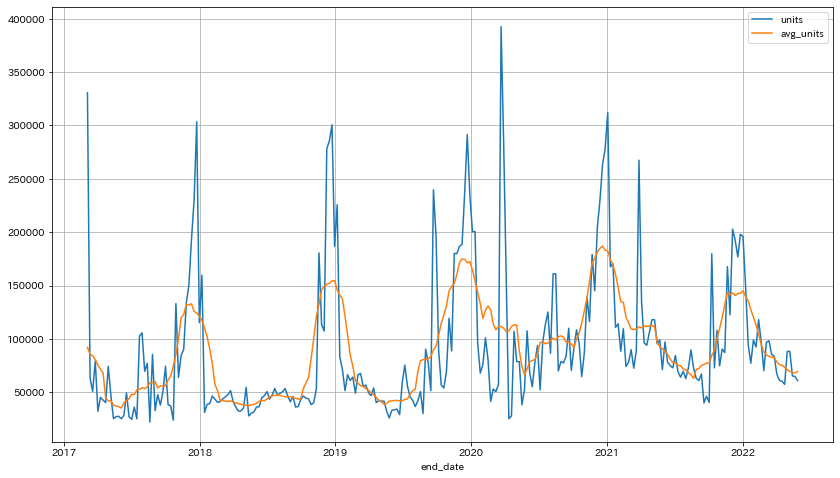

In [5]:
plot_weekly_avg("Switch")

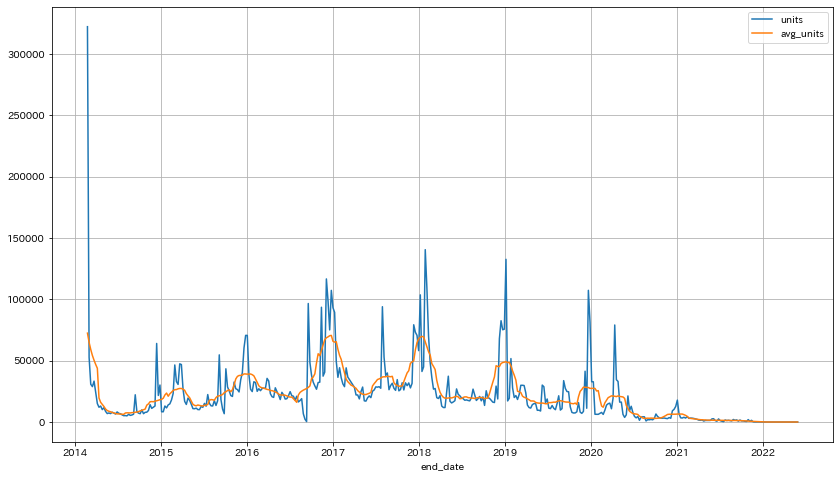

In [6]:
plot_weekly_avg("PS4")

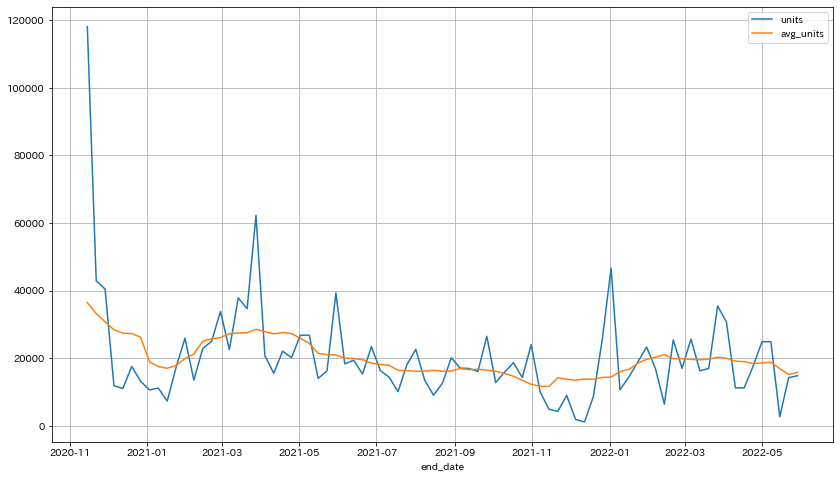

In [7]:
plot_weekly_avg("PS5")

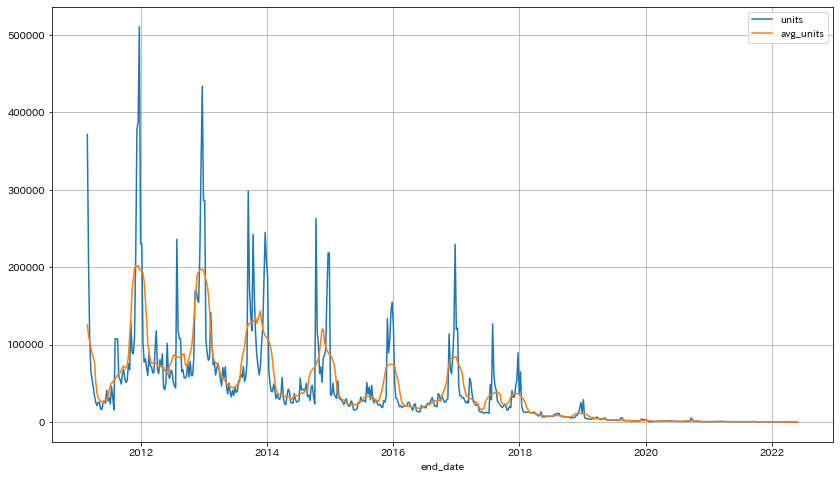

In [8]:
plot_weekly_avg("3DS")

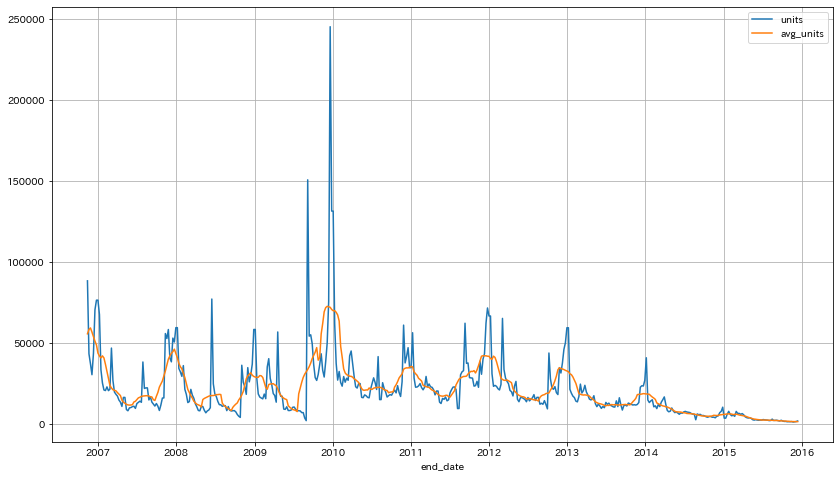

In [9]:
plot_weekly_avg("PS3")